# Introduction

Airbnb offers six categories for guests to rate their experience and they are accuracy, cleanliness, check-in, communication, location, and value. In addition to the six categories, however, guests give an overall rating to Airbnb hosts. Since the overall rating isn't calculated based on the six categories, this notebook will take a closer look at each category in San Francisco, Seattle, and New York City and explore which category has a larger influence on the overall score. 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
# code formatter
%load_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
# read data files
listing_df_sf = pd.read_csv('Data/SF/listings.csv.gz', sep=',', compression='gzip')
listing_df_sea = pd.read_csv('Data/Seattle/listings.csv.gz', sep=',', compression='gzip') 
listing_df_nyc = pd.read_csv('Data/NYC/listings.csv.gz', sep=',', compression='gzip') 

<IPython.core.display.Javascript object>

# Data preprocessing

In [5]:
# select corresponding columns
category_df_sf = listing_df_sf[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
category_df_sea = listing_df_sea[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
category_df_nyc = listing_df_nyc[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

<IPython.core.display.Javascript object>

In [6]:
category_df_nyc

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,94.0,9.0,9.0,10.0,10.0,10.0,9.0
1,89.0,10.0,9.0,9.0,10.0,10.0,10.0
2,90.0,8.0,8.0,10.0,10.0,9.0,9.0
3,97.0,10.0,10.0,10.0,10.0,8.0,10.0
4,84.0,9.0,8.0,9.0,9.0,10.0,9.0
...,...,...,...,...,...,...,...
36900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36903,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [7]:
# Drop nans
category_df_sf = category_df_sf.dropna(axis = 0)
category_df_sea = category_df_sea.dropna(axis = 0)
category_df_nyc = category_df_nyc.dropna(axis = 0)

<IPython.core.display.Javascript object>

In [8]:
category_df_nyc

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,94.0,9.0,9.0,10.0,10.0,10.0,9.0
1,89.0,10.0,9.0,9.0,10.0,10.0,10.0
2,90.0,8.0,8.0,10.0,10.0,9.0,9.0
3,97.0,10.0,10.0,10.0,10.0,8.0,10.0
4,84.0,9.0,8.0,9.0,9.0,10.0,9.0
...,...,...,...,...,...,...,...
36718,100.0,10.0,10.0,10.0,10.0,10.0,10.0
36759,100.0,10.0,10.0,10.0,10.0,10.0,10.0
36766,60.0,10.0,10.0,2.0,10.0,8.0,8.0
36783,100.0,10.0,10.0,10.0,10.0,10.0,10.0


<IPython.core.display.Javascript object>

In [9]:
# combining 3 cities together
category_df_combined = category_df_sf.append([category_df_sea,category_df_nyc],ignore_index=True)

<IPython.core.display.Javascript object>

In [10]:
category_df_combined

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,97.0,10.0,10.0,10.0,10.0,10.0,10.0
1,98.0,10.0,10.0,10.0,10.0,10.0,9.0
2,84.0,7.0,8.0,9.0,9.0,9.0,8.0
3,93.0,9.0,9.0,10.0,10.0,9.0,9.0
4,97.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...
34825,100.0,10.0,10.0,10.0,10.0,10.0,10.0
34826,100.0,10.0,10.0,10.0,10.0,10.0,10.0
34827,60.0,10.0,10.0,2.0,10.0,8.0,8.0
34828,100.0,10.0,10.0,10.0,10.0,10.0,10.0


<IPython.core.display.Javascript object>

# Fitting data to models

In [11]:
category_list = ['accuracy','cleanliness','checkin','communication','location','value']

<IPython.core.display.Javascript object>

In [14]:
def get_r2_score(X,y):
    # define the model
    model = LinearRegression()

    # fit the model
    model.fit(X, y)

    # get importance
    importance = model.coef_

    # coefficient of determination
    r_sq = model.score(X, y)
    return r_sq

<IPython.core.display.Javascript object>

In [17]:
X = category_df_sf[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
y = category_df_sf['review_scores_rating']
print('sf_r2:', get_r2_score(X,y))

X = category_df_sea[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
y = category_df_sea['review_scores_rating']
print('seattle_r2:', get_r2_score(X,y))

X = category_df_nyc[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
y = category_df_nyc['review_scores_rating']
print('nyc_r2:', get_r2_score(X,y))

X = category_df_combined[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
y = category_df_combined['review_scores_rating']
print('combined_r2:', get_r2_score(X,y))

sf_r2: 0.7141217811256346
seattle_r2: 0.7915137391416954
nyc_r2: 0.7976129230910798
combined_r2: 0.7879129819737622


<IPython.core.display.Javascript object>

The coefficient of determination (R^2) tells us the amount of variation in y can be explained by the dependence on x using the linear regression model. If the value of coefficient of determination is 1, it indicates a perfect fit. A value closer to 1 indicates a better fit and means that the model can explain the variation of the output with different inputs. 

In other words, the 6 category ratings explain about 79% of the overall score in San Francisco, Seattle, and New York. It isn't a bad score but there's still 21% that's missing. It also does not mean that overall score is calculated using category ratings. This only means that category ratings help explain 79% of the overall score.

In [26]:
def plot_importance(df,title):
    # define the model
    model = LinearRegression()
    
    X = df[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
    y = df['review_scores_rating']
    
    # fit the model
    model.fit(X, y)

    # get importance
    importance = model.coef_
    
    # plot feature importance
    pyplot.figure(figsize=(8,5))
    pyplot.bar([x for x in category_list], importance)
    pyplot.title(title)
    return pyplot.show()

<IPython.core.display.Javascript object>

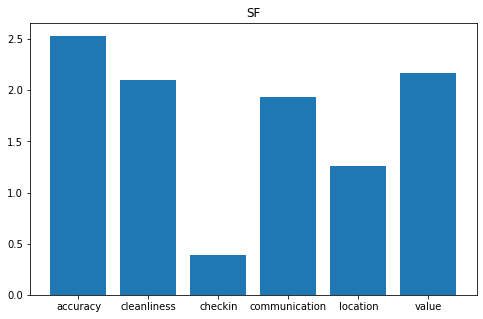

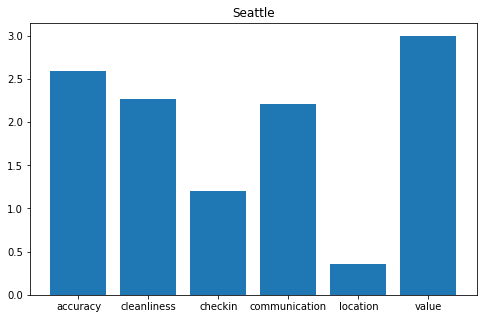

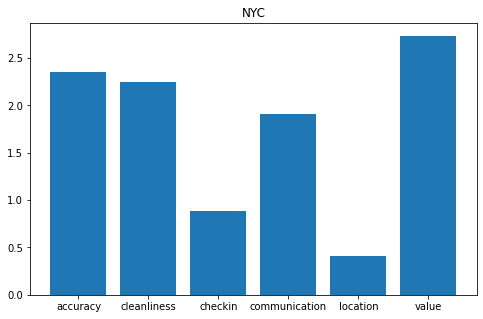

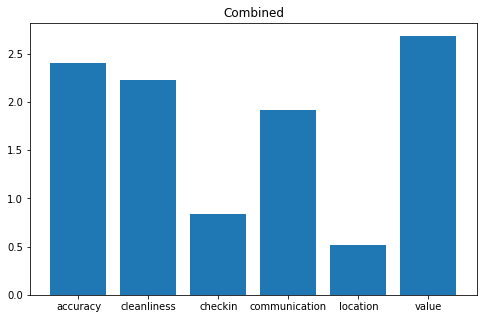

<IPython.core.display.Javascript object>

In [32]:
plot_importance(category_df_sf,'SF')
plot_importance(category_df_sea, 'Seattle')
plot_importance(category_df_nyc,'NYC')
plot_importance(category_df_combined,'Combined')

[0.1593591  0.2487275  0.09646743 0.11390822 0.12622335 0.2553144 ]


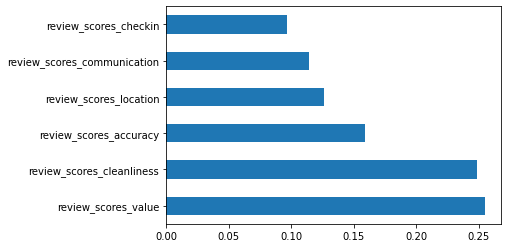

<IPython.core.display.Javascript object>

In [16]:
# use tree based classifiers to get feature importance
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 

# plot graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
pyplot.show()

In [33]:
def kbest(df, title):
    
    # apply SelectKBest class to extract top features
    bestfeatures = SelectKBest(score_func=chi2, k=6)
    
    X = df[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
    y = df['review_scores_rating']
    
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    # concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Category','Score']  #naming the dataframe columns
    #print(featureScores.nlargest(6,'Score'))  #print 6 best features
    
    pyplot.figure(figsize=(8,5))
    pyplot.title(title + ' SelectKBest')
    return pyplot.bar(category_list, featureScores.Score) 

<IPython.core.display.Javascript object>

<BarContainer object of 6 artists>

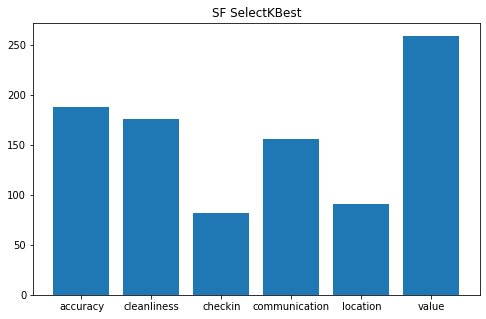

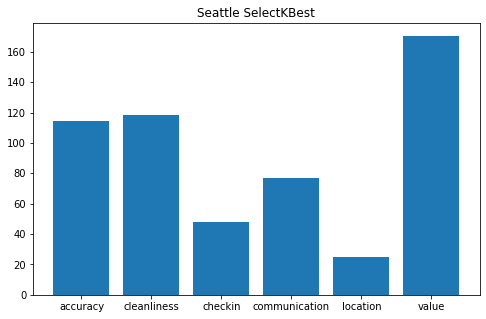

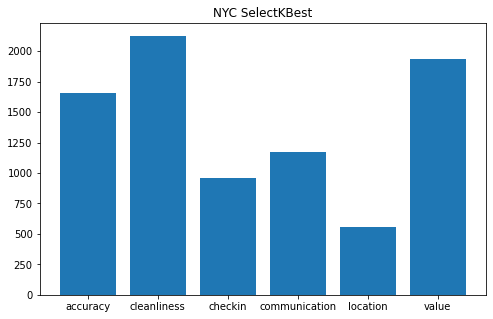

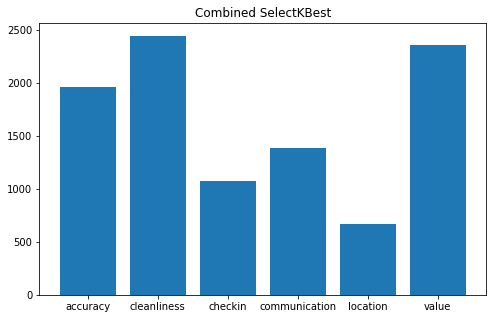

<IPython.core.display.Javascript object>

In [34]:
kbest(category_df_sf,'SF')
kbest(category_df_sea, 'Seattle')
kbest(category_df_nyc,'NYC')
kbest(category_df_combined,'Combined')

# Conclusion

Although different cities have a slightly different top three categories, we can still conclude that cleanliness, value and accuracy are the top three categories that have a strong relationship with overall ratings. 

As shown in the above table, in the combined data of San Francisco, Seattle, New York City, cleanliness is the most important, followed by value and accuracy.

Check-in is not a big factor to the overall rating. It's possible that the duration of check-in is usually quick (less than 5 mins) and hence, it has minimal effect on guests' overall staying experience. Moreover, location is the least important when it comes to overall rating. It could be most listings' location is more or less the same as guests expected. As a result, it isn't a determining category.